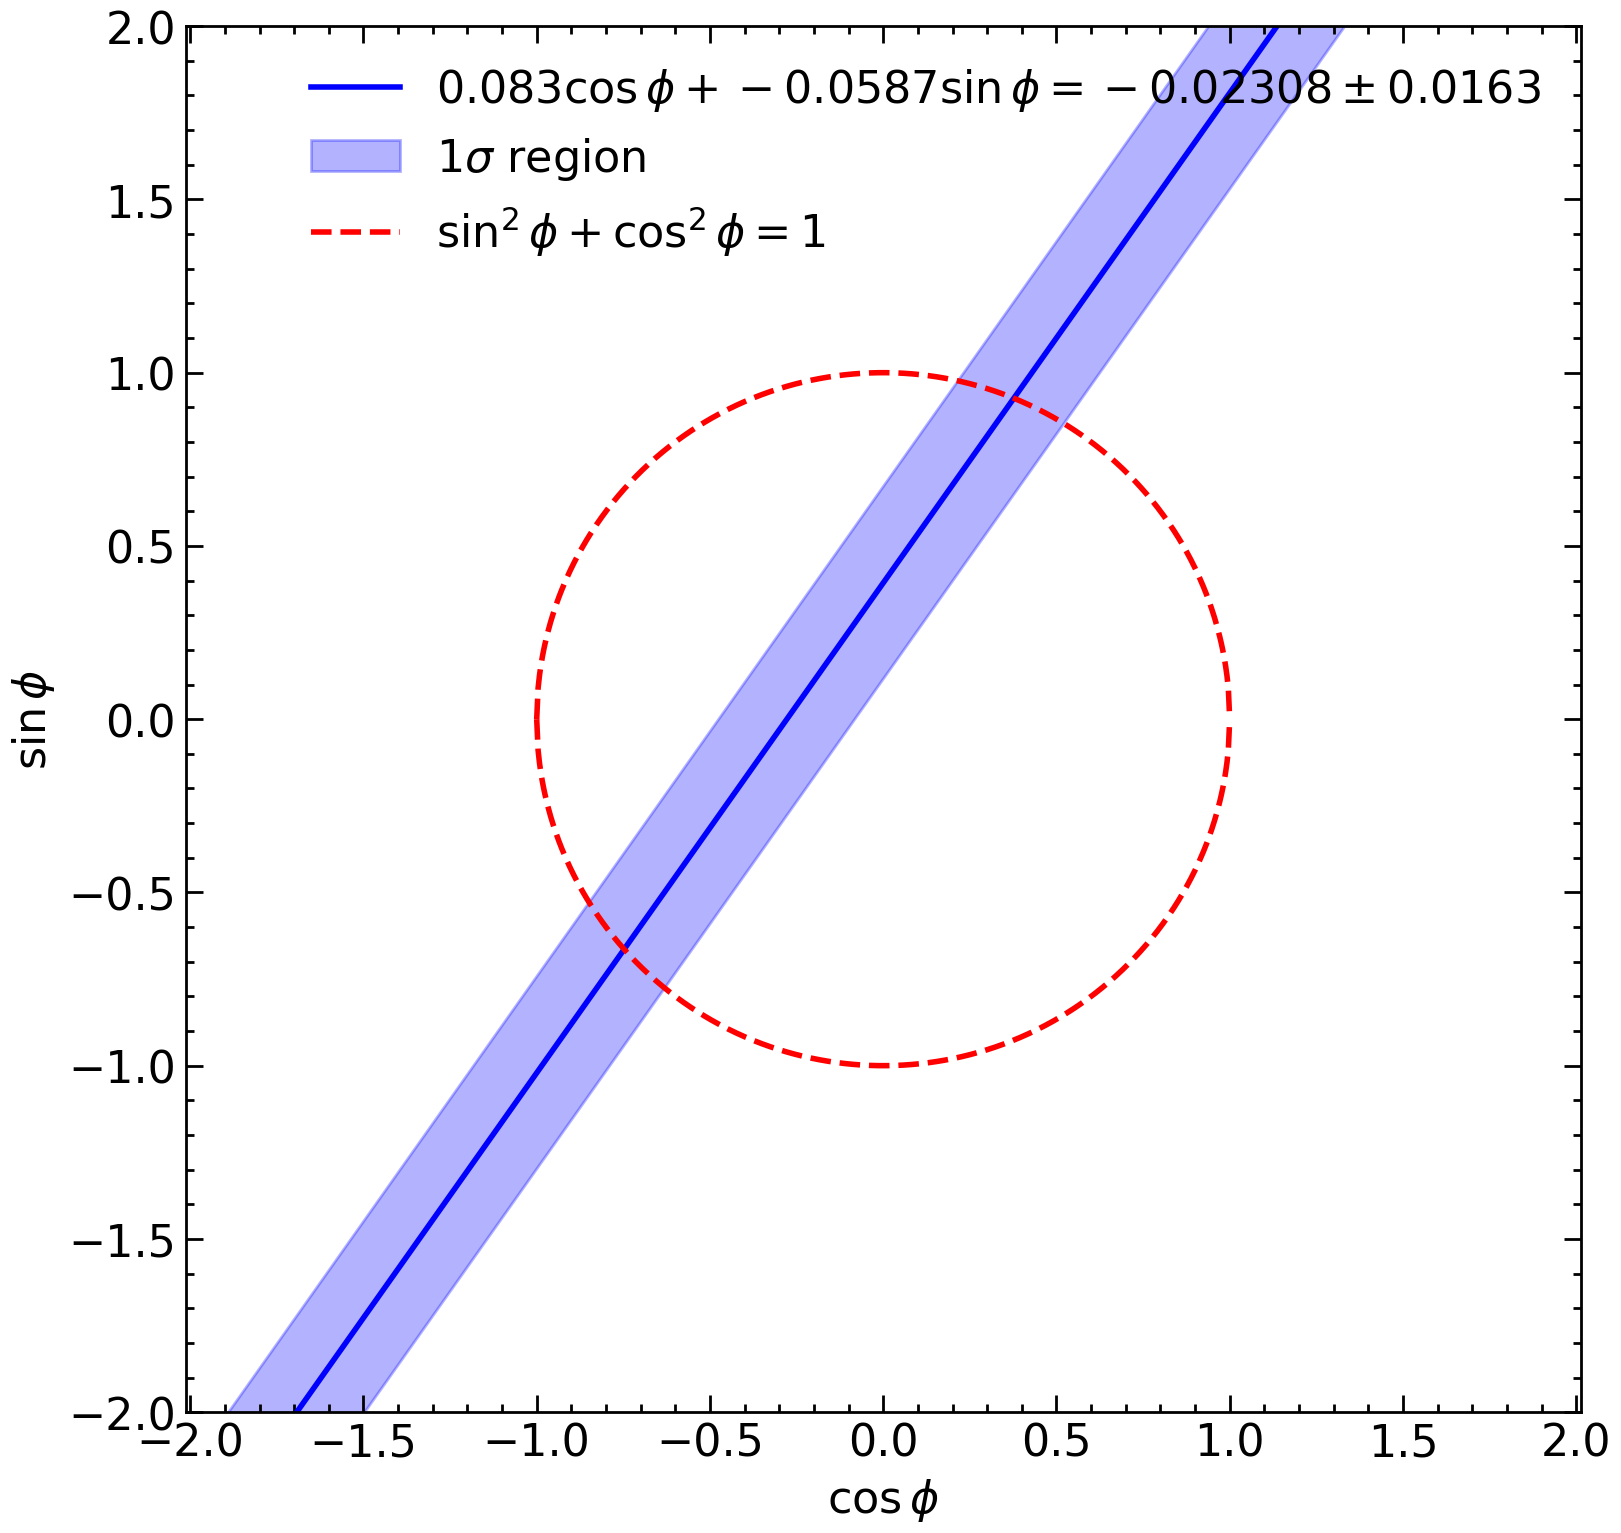

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
plt.style.use(['science', 'notebook'])

%config InlineBackend.figure_format = 'retina'

# Define constants for the equation
# a = 0.043 # makise
# b = 0.155

# a = 0.115 # auton
# b = -0.047 

# a = 0.0417
# b = -0.0295

# a = 0.1359 # jendle
# b = -0.0961

a = 0.0830
b = -0.0587

# a = 0.0577
# b = -0.0408

# a = 0.0814
# b = -0.0575

# a = 0.1504 #2023 dec BR NNDC
# b = -0.1064

# a = 0.0510 #2023 
# b = -0.0361




# a = 0.043
# b = 0.3

# c = 0.2178
# sigma = 0.07767
# c = 0.1691
# sigma = 0.07865
# c = -0.063
# sigma = 0.043

# c = -0.1
# sigma = 0.02977



# c = -0.023
# sigma = 0.016
c = -0.02308
sigma = 0.01630






# Generate an array for cos(x) values for the circle equation
circle_cos = np.linspace(-1, 1, 500)
# Calculate the corresponding sin(x) values based on the circle equation sin^2 + cos^2 = 1
circle_sin = np.sqrt(1 - circle_cos**2)

# Generate an array for cos(x) values
cos_x = np.linspace(-4, 4, 1000)
# Calculate the corresponding sin(x) values based on the equations
sin_x_central = (c - a * cos_x) / b
sin_x_upper = (c + sigma - a * cos_x) / b
sin_x_lower = (c - sigma - a * cos_x) / b

# Update plot style for darker right and top spines
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

# Create the plot
plt.figure(figsize=(9, 9))

# Plot the central line using the further extended range
plt.plot(cos_x, sin_x_central, label=f'${a} \\cos \\phi + {b} \\sin \\phi= {c} \\pm {sigma}$', color='blue')

# Plot the 1-sigma error region extended to the further extended range
plt.fill_between(cos_x, sin_x_lower, sin_x_upper, color='blue', alpha=0.3, label=f'$1\\sigma$ region')

# Plot the circle equation
plt.plot(circle_cos, circle_sin, linestyle='--', color='red', label='$\\sin^2 \\phi + \\cos^2 \\phi = 1$')
plt.plot(circle_cos, -circle_sin, linestyle='--', color='red')

# Set axis labels
plt.xlabel('$\\cos \\phi$')
plt.ylabel('$\\sin \\phi$')

# Extend and square the axes but limit the view to [-2, 2]
plt.axis('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# plt.xlim([-1.5, 1.5])
# plt.ylim([-1.5, 1.5])

# Add legend
plt.legend()

# Show the plot
plt.show()

# Reset plot style to default for future plots
mpl.rcParams.update(mpl.rcParamsDefault)


In [2]:
import numpy as np
from scipy.optimize import fsolve


# Intersection functions
def central_intersection(cos_phi):
    sin_phi = (c - a * cos_phi) / b
    return sin_phi**2 + cos_phi**2 - 1


def upper_intersection(cos_phi):
    sin_phi = (c + sigma - a * cos_phi) / b
    return sin_phi**2 + cos_phi**2 - 1


def lower_intersection(cos_phi):
    sin_phi = (c - sigma - a * cos_phi) / b
    return sin_phi**2 + cos_phi**2 - 1


# Solve for intersections
central_intersections_cos = fsolve(central_intersection, [-1, 1])
upper_intersections_cos = fsolve(upper_intersection, [-1, 1])
lower_intersections_cos = fsolve(lower_intersection, [-1, 1])

# Calculate corresponding sin(phi) values
central_intersections_sin = (c - a * central_intersections_cos) / b
upper_intersections_sin = (c + sigma - a * upper_intersections_cos) / b
lower_intersections_sin = (c - sigma - a * lower_intersections_cos) / b

# Calculate phi values
central_phi = np.arctan2(central_intersections_sin, central_intersections_cos)
upper_phi = np.arctan2(upper_intersections_sin, upper_intersections_cos)
lower_phi = np.arctan2(lower_intersections_sin, lower_intersections_cos)

# Ensure phi values are positive
central_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in central_phi]
upper_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in upper_phi]
lower_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in lower_phi]

# Convert radians to degrees for better readability
central_phi_degrees = np.degrees(central_phi_positive)
upper_phi_degrees = np.degrees(upper_phi_positive)
lower_phi_degrees = np.degrees(lower_phi_positive)

# Output results
intersections_phi = [
    ("Lower 1σ 1", lower_phi_degrees[0]),
    ("Central 1", central_phi_degrees[0]),
    ("Upper 1σ 1", upper_phi_degrees[0]),
    ("Lower 1σ 2", lower_phi_degrees[1]),
    ("Central 2", central_phi_degrees[1]),
    ("Upper 1σ 2", upper_phi_degrees[1]),
]

for intersection in intersections_phi:
    print(f"{intersection[0]}: Φ = {intersection[1]:.2f}°")

Lower 1σ 1: Φ = 211.94°
Central 1: Φ = 221.61°
Upper 1σ 1: Φ = 230.91°
Lower 1σ 2: Φ = 77.52°
Central 2: Φ = 67.85°
Upper 1σ 2: Φ = 58.56°


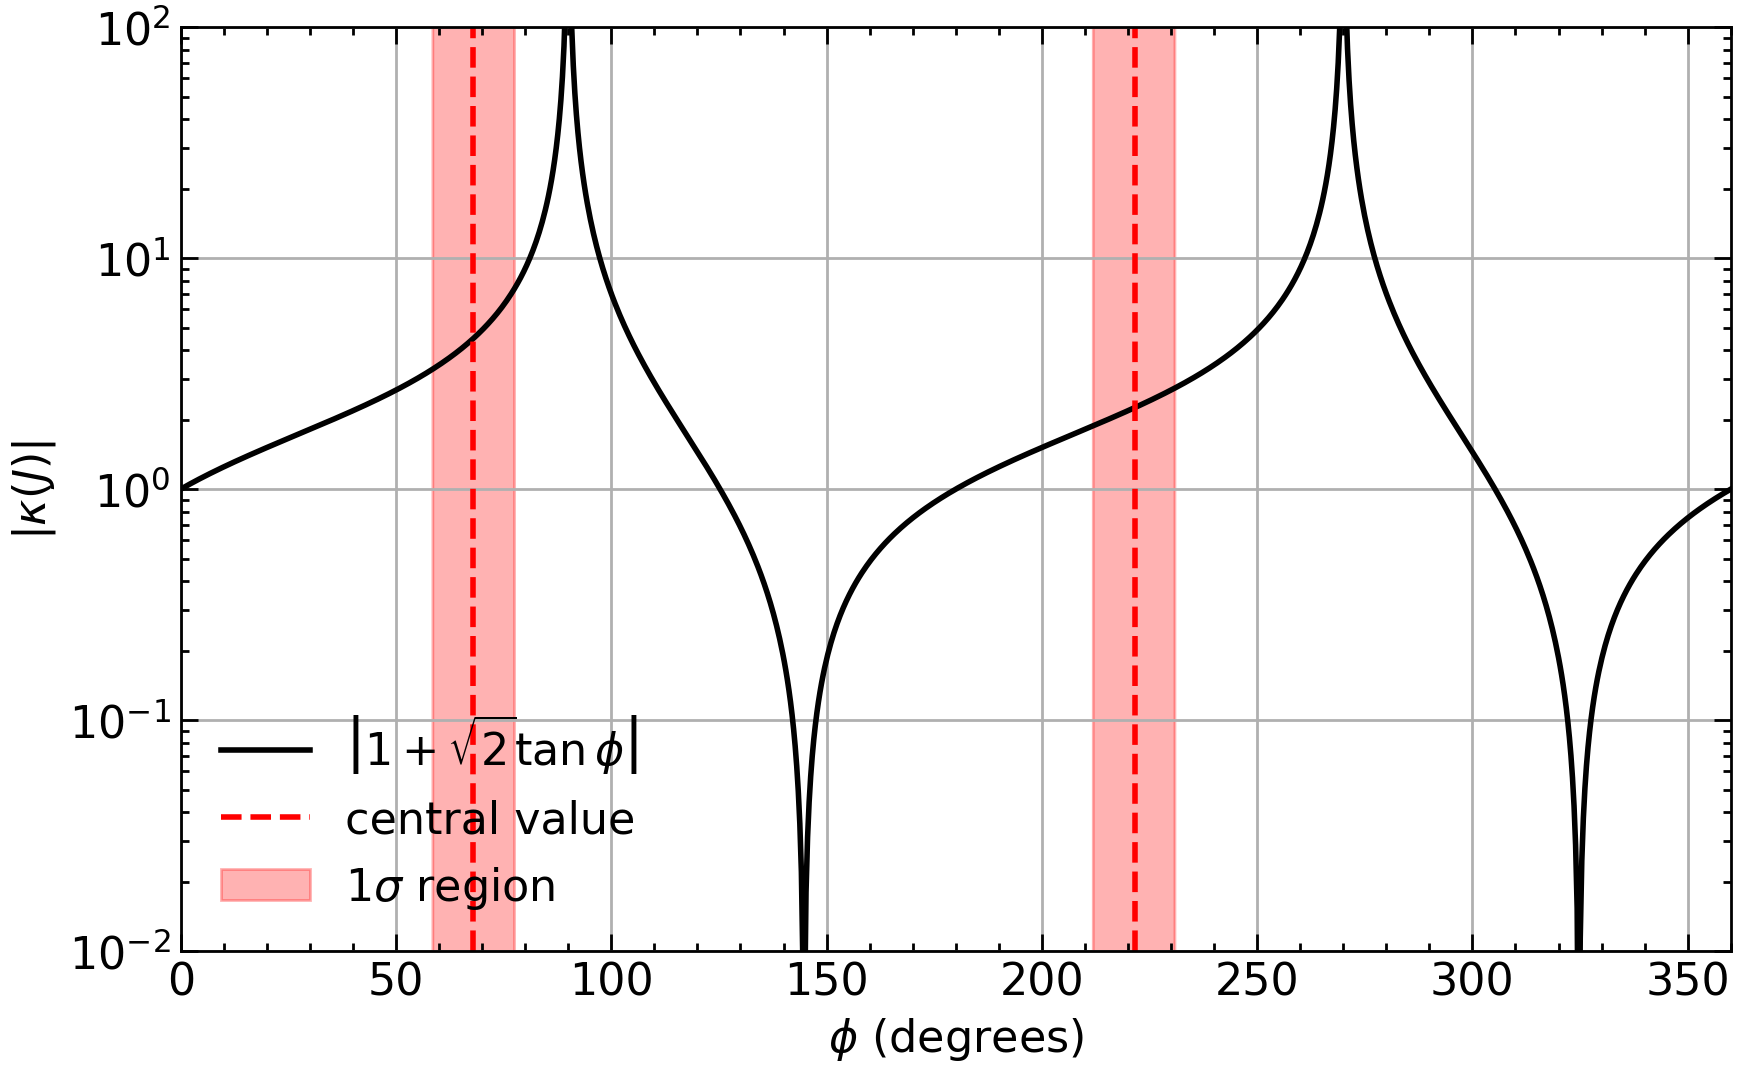

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook'])

%config InlineBackend.figure_format = 'retina'

# Define the function and the range
x = np.linspace(0, 360, 1000)  # x values in degrees

y = np.abs(1 + np.sqrt(2) * np.tan(np.radians(x)))  # Convert degrees to radians for np.tan
y_shade = np.linspace(0.001,100,1000)


# Plotting
plt.figure(figsize=(10, 6))
plt.semilogy(x, y, color='black', label='$\\left| 1 + \\sqrt{2} \\tan \\phi \\right|$')
plt.axvline(x=central_phi_degrees[0], color='red', linestyle='--', label=f'central value')
plt.axvline(x=central_phi_degrees[1], color='red', linestyle='--')

plt.fill_betweenx(y_shade, lower_phi_degrees[0], upper_phi_degrees[0], color='red', alpha=0.3, label=f'$1\\sigma$ region')
plt.fill_betweenx(y_shade, lower_phi_degrees[1], upper_phi_degrees[1], color='red', alpha=0.3)

# plt.fill_betweenx(y_shade, 45.089, 103.901, color='red', alpha=0.3, label=f'$1\\sigma$ region')

plt.xlabel(r'$\phi$ (degrees)')
plt.ylabel(r'$|\kappa(J)|$')
plt.xlim(0, 360)  # Limit x-axis to 0-360 degrees
plt.ylim(1e-2, 1e2)  # Limit y-axis from 10^-2 to 10^2
plt.grid(True)
plt.legend()
plt.show()


In [4]:
# Define the function
def y_func(phi_degrees):
    return np.abs(1 + np.sqrt(2) * np.tan(np.radians(phi_degrees)))

# Compute kappa values at central, upper, and lower phi values
# For the first central phi value
kappa_central_0 = y_func(central_phi_degrees[0])
kappa_upper_0 = y_func(upper_phi_degrees[0])
kappa_lower_0 = y_func(lower_phi_degrees[0])

print (kappa_lower_0, kappa_central_0, kappa_upper_0)

# Calculate asymmetric uncertainties in kappa for the first central phi value
delta_kappa_plus_0 = kappa_upper_0 - kappa_central_0   # Positive uncertainty
delta_kappa_minus_0 = kappa_central_0 - kappa_lower_0  # Negative uncertainty

# For the second central phi value
kappa_central_1 = y_func(central_phi_degrees[1])
kappa_lower_1 = y_func(upper_phi_degrees[1])
kappa_upper_1 = y_func(lower_phi_degrees[1])

print (kappa_lower_1, kappa_central_1, kappa_upper_1)


# Calculate asymmetric uncertainties in kappa for the second central phi value
delta_kappa_plus_1 = kappa_upper_1 - kappa_central_1
delta_kappa_minus_1 = kappa_central_1 - kappa_lower_1

# Print the results with asymmetric uncertainties
print(f"First central phi = {central_phi_degrees[0]:.3f}°")
print(f"kappa = {kappa_central_0:.3f} +{delta_kappa_plus_0:.3f} / -{delta_kappa_minus_0:.3f}")

print(f"Second central phi = {central_phi_degrees[1]:.3f}°")
print(f"kappa = {kappa_central_1:.3f} +{delta_kappa_plus_1:.3f} / -{delta_kappa_minus_1:.3f}")


1.8816387170117728 2.255974969056518 2.74061598201781
3.3127687993499237 4.474667929748808 7.390691785619197
First central phi = 221.609°
kappa = 2.256 +0.485 / -0.374
Second central phi = 67.853°
kappa = 4.475 +2.916 / -1.162


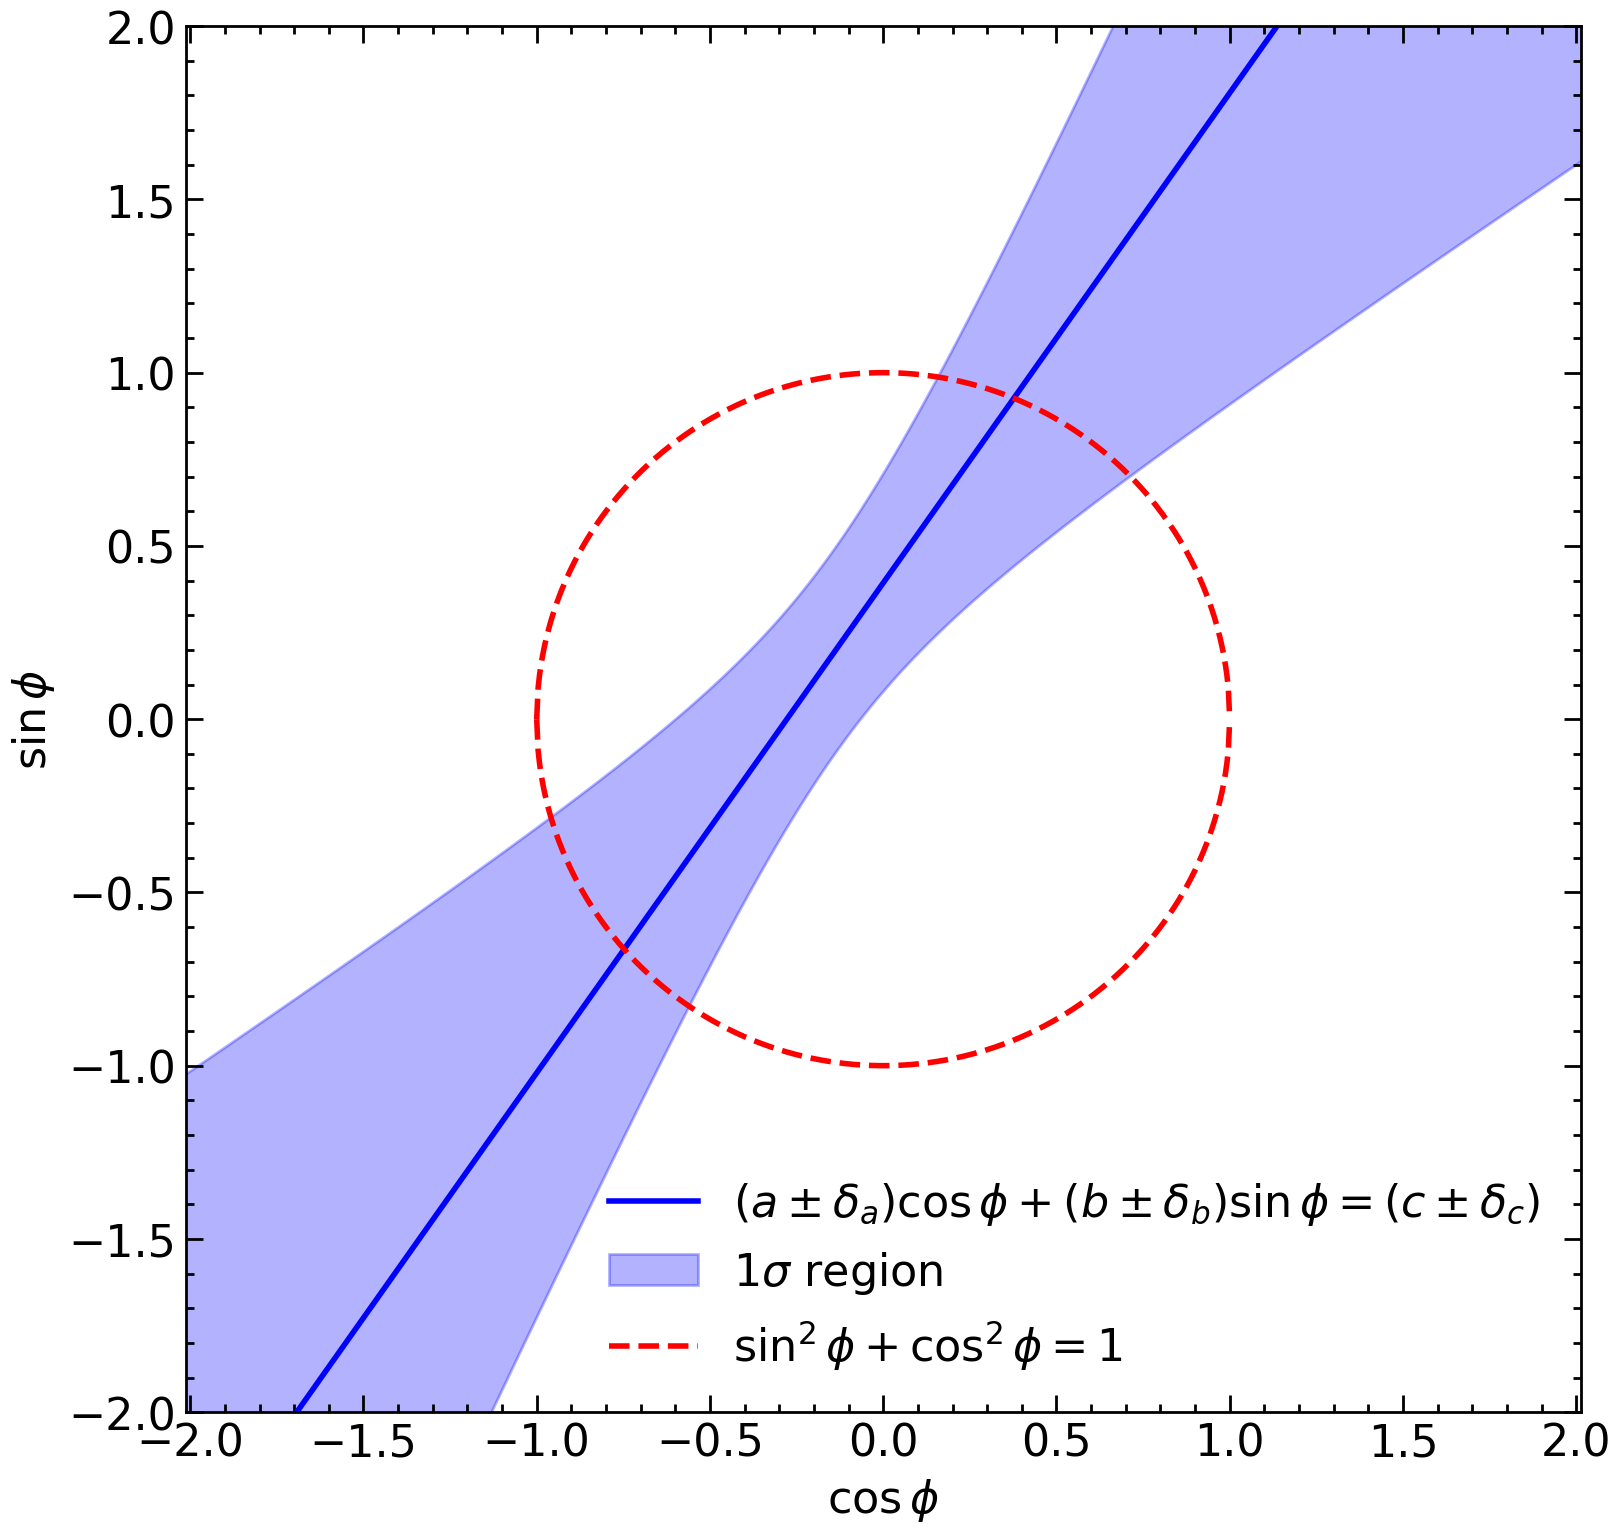

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
plt.style.use(['science', 'notebook'])

# Define constants for the equation along with uncertainties
a = 0.0830  # central value of a
b = -0.0587  # central value of b
c = -0.02308  # central value of c

da = 0.0309  # uncertainty in a
db = 0.0219  # uncertainty in b
dc = 0.01630  # uncertainty in c

# da = 0  # uncertainty in a
# db = 0 # uncertainty in b
# dc = 0.01630  # uncertainty in c

# Generate an array for cos(x) values for the circle equation
circle_cos = np.linspace(-1, 1, 500)
circle_sin = np.sqrt(1 - circle_cos**2)

# Generate an array for cos(x) values
cos_x = np.linspace(-4, 4, 1000)

# Calculate the central sin(x) values based on the equation
sin_x_central = (c - a * cos_x) / b

# Calculate the partial derivatives of sin(phi) w.r.t. a, b, and c
d_sin_x_da = -cos_x / b
d_sin_x_db = -(c - a * cos_x) / (b ** 2)
d_sin_x_dc = 1 / b

# Calculate the total propagated uncertainty using error propagation
delta_sin_x = np.sqrt((d_sin_x_da * da) ** 2 + (d_sin_x_db * db) ** 2 + (d_sin_x_dc * dc) ** 2)

# Calculate the upper and lower bounds for the sin(phi) values
sin_x_upper = sin_x_central + delta_sin_x
sin_x_lower = sin_x_central - delta_sin_x

# Update plot style for darker right and top spines
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

# Create the plot
plt.figure(figsize=(9, 9))

# Plot the central line
plt.plot(cos_x, sin_x_central, label=f'$(a \\pm \\delta_a) \\cos \\phi + (b \\pm \\delta_b)\\sin \\phi= (c \\pm \\delta_c)$', color='blue')

# Plot the combined error band from all uncertainties
plt.fill_between(cos_x, sin_x_lower, sin_x_upper, color='blue', alpha=0.3, label=f'$1\\sigma$ region')

# Plot the circle equation
plt.plot(circle_cos, circle_sin, linestyle='--', color='red', label='$\\sin^2 \\phi + \\cos^2 \\phi = 1$')
plt.plot(circle_cos, -circle_sin, linestyle='--', color='red')

# Set axis labels
plt.xlabel('$\\cos \\phi$')
plt.ylabel('$\\sin \\phi$')

# Extend and square the axes but limit the view to [-2, 2]
plt.axis('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Add legend
plt.legend()

# Show the plot
plt.show()

# Reset plot style to default for future plots
mpl.rcParams.update(mpl.rcParamsDefault)


In [6]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
plt.style.use(['science', 'notebook'])


# Circle equation: sin^2 + cos^2 = 1
def circle_eq(cos_phi, sin_phi):
    return sin_phi**2 + cos_phi**2 - 1

# Function for central, upper, and lower sin_x values
def central_sin_x(cos_phi):
    return (c - a * cos_phi) / b

def lower_sin_x(cos_phi):
    # Error propagation for upper bound
    d_sin_x_da = -cos_phi / b
    d_sin_x_db = -(c - a * cos_phi) / (b ** 2)
    d_sin_x_dc = 1 / b
    delta_sin_x = np.sqrt((d_sin_x_da * da) ** 2 + (d_sin_x_db * db) ** 2 + (d_sin_x_dc * dc) ** 2)
    return central_sin_x(cos_phi) + delta_sin_x

def upper_sin_x(cos_phi):
    # Error propagation for lower bound
    d_sin_x_da = -cos_phi / b
    d_sin_x_db = -(c - a * cos_phi) / (b ** 2)
    d_sin_x_dc = 1 / b
    delta_sin_x = np.sqrt((d_sin_x_da * da) ** 2 + (d_sin_x_db * db) ** 2 + (d_sin_x_dc * dc) ** 2)
    return central_sin_x(cos_phi) - delta_sin_x

# Intersection functions with the circle
def central_intersection(cos_phi):
    return circle_eq(cos_phi, central_sin_x(cos_phi))

def upper_intersection(cos_phi):
    return circle_eq(cos_phi, upper_sin_x(cos_phi))

def lower_intersection(cos_phi):
    return circle_eq(cos_phi, lower_sin_x(cos_phi))

# Solve for intersections (cos_phi) for central, upper, and lower cases
central_intersections_cos = fsolve(central_intersection, [-1, 1])
upper_intersections_cos = fsolve(upper_intersection, [-1, 1])
lower_intersections_cos = fsolve(lower_intersection, [-1, 1])

# Calculate corresponding sin(phi) values for central, upper, and lower intersections
central_intersections_sin = central_sin_x(central_intersections_cos)
upper_intersections_sin = upper_sin_x(upper_intersections_cos)
lower_intersections_sin = lower_sin_x(lower_intersections_cos)

# Calculate phi values (angles in radians) using arctan2 for central, upper, and lower intersections
central_phi = np.arctan2(central_intersections_sin, central_intersections_cos)
upper_phi = np.arctan2(upper_intersections_sin, upper_intersections_cos)
lower_phi = np.arctan2(lower_intersections_sin, lower_intersections_cos)

# Ensure phi values are positive by adding 2π where necessary
central_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in central_phi]
upper_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in upper_phi]
lower_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in lower_phi]

# Convert radians to degrees for better readability
central_phi_degrees = np.degrees(central_phi_positive)
upper_phi_degrees = np.degrees(upper_phi_positive)
lower_phi_degrees = np.degrees(lower_phi_positive)

# Output results
intersections_phi = [
    ("Lower 1σ 1", lower_phi_degrees[0]),
    ("Central 1", central_phi_degrees[0]),
    ("Upper 1σ 1", upper_phi_degrees[0]),
    ("Lower 1σ 2", lower_phi_degrees[1]),
    ("Central 2", central_phi_degrees[1]),
    ("Upper 1σ 2", upper_phi_degrees[1]),
]

for intersection in intersections_phi:
    print(f"{intersection[0]}: Φ = {intersection[1]:.2f}°")


Lower 1σ 1: Φ = 196.49°
Central 1: Φ = 221.61°
Upper 1σ 1: Φ = 235.99°
Lower 1σ 2: Φ = 80.89°
Central 2: Φ = 67.85°
Upper 1σ 2: Φ = 44.49°


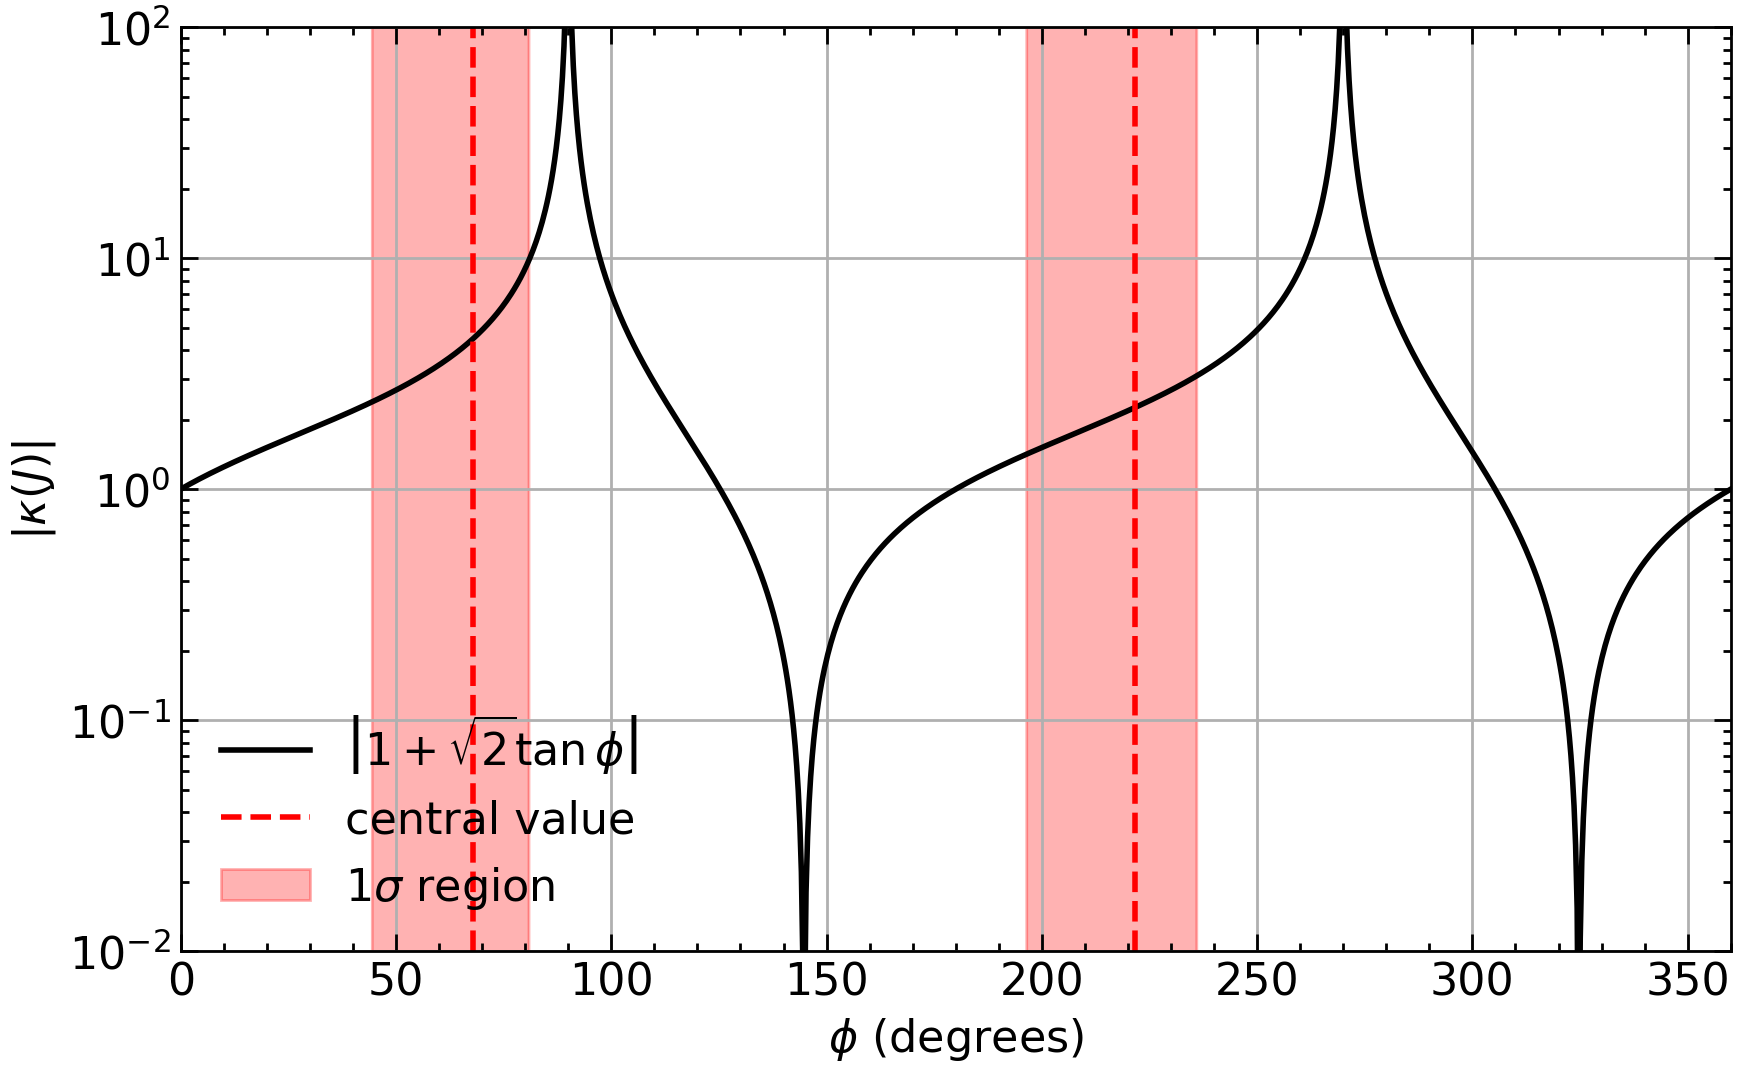

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook'])

%config InlineBackend.figure_format = 'retina'

# Define the function and the range
x = np.linspace(0, 360, 1000)  # x values in degrees

y = np.abs(1 + np.sqrt(2) * np.tan(np.radians(x)))  # Convert degrees to radians for np.tan
y_shade = np.linspace(0.001,100,1000)


# Plotting
plt.figure(figsize=(10, 6))
plt.semilogy(x, y, color='black', label='$\\left| 1 + \\sqrt{2} \\tan \\phi \\right|$')
plt.axvline(x=central_phi_degrees[0], color='red', linestyle='--', label=f'central value')
plt.axvline(x=central_phi_degrees[1], color='red', linestyle='--')

plt.fill_betweenx(y_shade, lower_phi_degrees[0], upper_phi_degrees[0], color='red', alpha=0.3, label=f'$1\\sigma$ region')
plt.fill_betweenx(y_shade, lower_phi_degrees[1], upper_phi_degrees[1], color='red', alpha=0.3)

# plt.fill_betweenx(y_shade, 45.089, 103.901, color='red', alpha=0.3, label=f'$1\\sigma$ region')

plt.xlabel(r'$\phi$ (degrees)')
plt.ylabel(r'$|\kappa(J)|$')
plt.xlim(0, 360)  # Limit x-axis to 0-360 degrees
plt.ylim(1e-2, 1e2)  # Limit y-axis from 10^-2 to 10^2
plt.grid(True)
plt.legend()
plt.show()




In [8]:
# Define the function
def y_func(phi_degrees):
    return np.abs(1 + np.sqrt(2) * np.tan(np.radians(phi_degrees)))

# Compute kappa values at central, upper, and lower phi values
# For the first central phi value
kappa_central_0 = y_func(central_phi_degrees[0])
kappa_upper_0 = y_func(upper_phi_degrees[0])
kappa_lower_0 = y_func(lower_phi_degrees[0])

print (kappa_lower_0, kappa_central_0, kappa_upper_0)

# Calculate asymmetric uncertainties in kappa for the first central phi value
delta_kappa_plus_0 = kappa_upper_0 - kappa_central_0    # Positive uncertainty
delta_kappa_minus_0 = kappa_central_0-kappa_lower_0 # Negative uncertainty

# For the second central phi value
kappa_central_1 = y_func(central_phi_degrees[1])
kappa_lower_1 = y_func(upper_phi_degrees[1])
kappa_upper_1 = y_func(lower_phi_degrees[1])

print (kappa_lower_1, kappa_central_1,  kappa_upper_1)

# Calculate asymmetric uncertainties in kappa for the second central phi value
delta_kappa_plus_1 = kappa_upper_1 - kappa_central_1 
delta_kappa_minus_1 = kappa_central_1  - kappa_lower_1

# Print the results with asymmetric uncertainties
print(f"First central phi = {central_phi_degrees[0]:.3f}°")
print(f"kappa = {kappa_central_0:.3f} +{delta_kappa_plus_0:.3f} / -{delta_kappa_minus_0:.3f}")

print(f"Second central phi = {central_phi_degrees[1]:.3f}°")
print(f"kappa = {kappa_central_1:.3f} +{delta_kappa_plus_1:.3f} / -{delta_kappa_minus_1:.3f}")


1.4185183551678622 2.255974969056518 3.095507284329911
2.3890229662495024 4.474667929748808 9.816011556108476
First central phi = 221.609°
kappa = 2.256 +0.840 / -0.837
Second central phi = 67.853°
kappa = 4.475 +5.341 / -2.086
